In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Airlines+Data.xlsx')

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


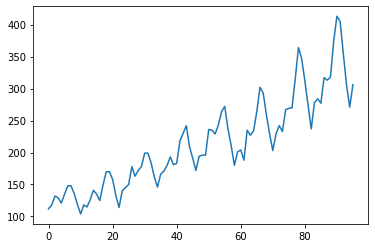

In [4]:
plt.plot(df.iloc[:,1])

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [7]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [8]:
training_size

62

In [9]:
test_size=len(df)-training_size

In [10]:
test_size

34

In [11]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [12]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [13]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [14]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [17]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
57/57 [==============================] - 2s 12ms/step - loss: 0.0187 - val_loss: 0.0901
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0306
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0354
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0397
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0327
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0385
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0378
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0396
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0396
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0388
Epoch 11

57/57 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0157
Epoch 84/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 85/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0111
Epoch 86/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0182
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0136
Epoch 88/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0158
Epoch 89/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0113
Epoch 90/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0159
Epoch 91/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0139
Epoch 92/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0123
Epoch 93/100


In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
test_predict

array([[0.5613717 ],
       [0.6666037 ],
       [0.53833437],
       [0.3958499 ],
       [0.37883443],
       [0.34764013],
       [0.4719875 ],
       [0.49227402],
       [0.39984182],
       [0.5553676 ],
       [0.53754044],
       [0.4942966 ],
       [0.69815886],
       [0.83541906],
       [0.60947526],
       [0.46607476],
       [0.46064854],
       [0.4111162 ],
       [0.62572825],
       [0.61201704],
       [0.48902038],
       [0.6837641 ],
       [0.6270369 ],
       [0.583138  ],
       [0.841517  ],
       [0.8975365 ],
       [0.6972332 ],
       [0.51056695],
       [0.47168073]], dtype=float32)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
test_predict

array([[277.46387],
       [309.98053],
       [270.34534],
       [226.31763],
       [221.05984],
       [211.42079],
       [249.84415],
       [256.11267],
       [227.55112],
       [275.60858],
       [270.1    ],
       [256.73767],
       [319.73108],
       [362.14447],
       [292.32785],
       [248.0171 ],
       [246.34041],
       [231.03491],
       [297.35004],
       [293.11328],
       [255.1073 ],
       [315.2831 ],
       [297.75443],
       [284.18964],
       [364.02875],
       [381.33878],
       [319.44504],
       [261.7652 ],
       [249.74934]], dtype=float32)

In [24]:
y_train.shape,train_predict.shape,train_predict

((57,),
 (57, 1),
 array([[134.75511],
        [129.12575],
        [146.43933],
        [156.6898 ],
        [154.27756],
        [143.27806],
        [129.6966 ],
        [117.13644],
        [130.6492 ],
        [121.54298],
        [134.33182],
        [148.99734],
        [140.28673],
        [133.5363 ],
        [162.27092],
        [179.88194],
        [174.59421],
        [163.58334],
        [142.15256],
        [128.7027 ],
        [155.94337],
        [152.07211],
        [157.0821 ],
        [190.60551],
        [165.90462],
        [182.24663],
        [190.14006],
        [211.2212 ],
        [205.20259],
        [186.2059 ],
        [169.69412],
        [159.6405 ],
        [183.77106],
        [181.19148],
        [188.58817],
        [203.80324],
        [185.07869],
        [192.51959],
        [236.84956],
        [238.39514],
        [243.12164],
        [200.36559],
        [194.4054 ],
        [186.00128],
        [212.85817],
        [206.85564],
        [201.373

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

186.30592455405926

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

280.9330008438764

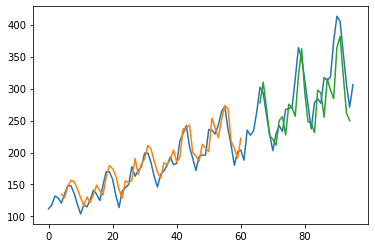

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()